In [1]:
using Gadfly
using Ensemble
using TestEnsembleGibbs

 in depwarn at ./deprecated.jl:62
 in oldstyle_vcat_warning at ./abstractarray.jl:28
 in vect at abstractarray.jl:31
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:55
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in include at ./boot.jl:253
 in include_from_node1 at ./loading.jl:133
 in reload_path at ./loading.jl:157
 in _require at ./loading.jl:69
 in require at ./loading.jl:52
 in include_string at loading.jl:99
 in execute_request_0x535c5df2 at /Users/farr/.julia/v0.4/IJulia/src/execute_request.jl:157
 in eventloop at /Users/farr/.julia/v0.4/IJulia/src/IJulia.jl:123
 in anonymous at task.jl:365
whi

## Testing EnsembleGibbs

In [3]:
xsdet, xsndet = TestEnsembleGibbs.draw()

([4.6681,3.43835,3.38247,3.52618,3.62907,5.47356,3.41307,3.32056,3.66363,4.61338  …  3.13978,2.96054,3.78806,4.0003,4.00329,2.263,3.76414,4.65673,5.64178,3.60445],[2.25497,2.50522,2.62779,2.12328,2.04865,2.53214,2.45968,3.55652,2.56782,2.86759  …  2.2455,2.55403,1.71404,3.01864,2.75498,2.95168,2.09461,1.93987,3.33274,2.99459])

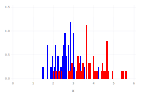

In [4]:
plot(layer(x=xsdet, Geom.histogram(density=true), Theme(default_color=color("red"))),
layer(x=xsndet, Geom.histogram(density=true), Theme(default_color=color("blue"))))

In [5]:
lnprob = TestEnsembleGibbs.make_lnprob(xsdet)

lnprob (generic function with 1 method)

In [6]:
ps = zeros(3, 100)
for j in 1:100
    for i in 1:3
        ps[i,j] = TestEnsembleGibbs.ptrue[i] + 1e-3*randn()
    end
end
gs = [TestEnsembleGibbs.draw(exp(ps[1,i]), ps[2,i], exp(ps[3,i]))[2] for i in 1:100]

100-element Array{Any,1}:
 [2.29016,2.29014,1.77016,2.7923,2.36575,3.05538,3.27118,1.5121,3.12897,2.99883  …  1.89975,2.02533,2.42971,2.22151,1.68267,2.94696,2.11522,2.82203,2.74444,3.24662]  
 [2.86158,1.23986,2.49861,2.44078,2.98988,2.30661,2.34794,1.81269,2.94488,2.47811  …  2.81573,1.713,2.60186,2.25644,1.84691,2.43017,2.06092,2.12732,2.63035,2.62695]  
 [2.20421,2.12901,2.27627,2.17681,2.47295,2.63883,1.98827,2.21927,1.47511,3.04137  …  1.99295,2.11668,1.99035,2.47963,1.68617,2.54022,2.52179,2.10344,2.96609,2.95432]
 [1.98865,2.33942,2.32745,2.30744,2.0407,3.39038,3.26307,2.89245,3.86984,2.33028  …  3.16155,2.70668,2.47543,1.97794,2.28604,2.69104,2.71163,2.42928,2.57593,2.17686] 
 [1.66351,3.85662,2.8156,2.66899,2.6884,2.74563,1.90575,2.56811,2.35812,2.20287  …  2.64624,2.33443,2.65418,2.08647,1.11554,1.84809,2.84904,3.23299,2.52658,2.20487]  
 [1.46731,1.96771,1.48457,2.42811,1.91093,2.07809,2.3939,1.76959,2.74635,2.47856  …  3.00499,1.96015,3.53513,2.9977,2.85759,1.89036,2.60629

In [7]:
lnprobs = EnsembleGibbs.lnprobs(ps, gs, lnprob)

100-element Array{Float64,1}:
 186.286
 201.494
 209.156
 206.731
 213.427
 170.076
 164.197
 248.296
 195.191
 167.579
 189.933
 184.769
 210.317
   ⋮    
 200.067
 191.219
 214.5  
 176.601
 216.6  
 199.135
 174.394
 197.62 
 150.163
 163.565
 214.65 
 203.449

In [8]:
for i in 1:100
    ps, gs, lnprobs = EnsembleGibbs.update(ps, gs, lnprobs, lnprob, TestEnsembleGibbs.gibbsupdate)
end

In [11]:
pmean = zeros(3)
for i in 1:size(ps, 2)
    for j in 1:3
        pmean[j] += ps[j,i]
    end
end
pmean /= size(ps,2)
pmean

3-element Array{Float64,1}:
  4.61738
  1.09808
 -1.16934

In [12]:
psig = zeros(3)
for i in 1:size(ps, 2)
    for j in 1:3
        psig[j] += (ps[j,i]-pmean[j])*(ps[j,i]-pmean[j])
    end
end
psig /= size(ps,2)
psig = sqrt(psig)

3-element Array{Float64,1}:
 0.200001 
 0.0846498
 0.164891 

In [14]:
(pmean[1]-TestEnsembleGibbs.ptrue[1])/psig[1], (pmean[2]-TestEnsembleGibbs.ptrue[2])/psig[2], (pmean[3]-TestEnsembleGibbs.ptrue[3])/psig[3]

(0.06105750203358407,-0.006275798238943626,-0.42892890574434417)

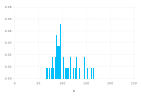

In [15]:
plot(x=exp(ps[1,:]), Geom.histogram(density=true))

In [16]:
pts, gibs, lnps = EnsembleGibbs.run_mcmc(ps, gs, lnprobs, lnprob, TestEnsembleGibbs.gibbsupdate, 1000; thin=10)

(
3x100x100 Array{Float64,3}:
[:, :, 1] =
  4.41393   5.02571    4.50538   4.3791   …   4.54519   4.34381   4.55749
  1.14518   0.946703   1.15204   1.14148      1.17788   1.12843   1.18152
 -1.2072   -0.852721  -1.21106  -1.4108      -1.35022  -1.21935  -1.28076

[:, :, 2] =
  4.63324   4.86986   4.49557   4.33074  …   4.85456   4.34453   4.63421
  1.10829   1.00557   1.0568    1.16957      1.14166   1.16293   1.1649 
 -1.20661  -0.96999  -1.0761   -1.4695      -1.34011  -1.30297  -1.23909

[:, :, 3] =
  4.62043   4.77085   4.76284    4.37134  …   4.66364   4.36439   4.5469 
  1.11583   1.03004   0.944169   1.11287      1.17425   1.13918   1.1818 
 -1.19321  -1.03518  -0.930472  -1.42973     -1.43813  -1.27339  -1.22556

...

[:, :, 98] =
  4.58807   4.37032   4.38434   4.64853  …   4.79794   4.75817    4.34144
  1.16376   1.20241   1.2043    1.08848      1.01405   0.997392   1.12691
 -1.35646  -1.32939  -1.3245   -1.2297      -1.12502  -1.05606   -1.09832

[:, :, 99] =
  4.65418   4.

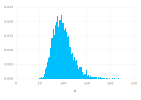

In [17]:
plot(x=exp(pts[1,:,:]), Geom.histogram(density=true))

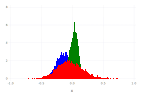

In [18]:
colors = [color("red"), color("green"), color("blue")]
layers = [layer(x=pts[i,:,:]-TestEnsembleGibbs.ptrue[i], Geom.histogram(density=true), Theme(default_color=colors[i])) for i in 1:3]
plot(layers...)

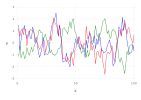

In [19]:
layers = Any[nothing for i in 1:3]
colors = [color("red"), color("green"), color("blue")]
for i in 1:3
    means = zeros(100)
    for j in 1:100
        means[j] = mean(pts[i,:,j])
    end
    mu = mean(means)
    sigma = std(means)
    layers[i] = layer(x=collect(1:100), y=(means-mu)/sigma, Geom.line, Theme(default_color=colors[i]))
end
plot(layers...)

## Testing Parameterizations

In [10]:
xs = rand(8)
xs /= sum(xs)
ps = Parameterizations.simplex_params(xs)
sum(abs(xs - Parameterizations.simplex_values(ps)))

1.4224732503009818e-16

In [17]:
function lnprob(p)
    x = Parameterizations.simplex_values(p)
    Parameterizations.simplex_logjac(x, p)
end

lnprob (generic function with 1 method)

In [29]:
ps = randn(2, 100)
lnprobs = EnsembleSampler.lnprobs(ps, lnprob)

100-element Array{Float64,1}:
 -3.50029
 -3.70682
 -3.51522
 -5.80036
 -5.87742
 -3.74291
 -3.30234
 -3.64495
 -4.32802
 -3.79676
 -4.22818
 -4.56883
 -4.50421
  ⋮      
 -3.418  
 -3.67044
 -3.64442
 -3.55403
 -3.92725
 -4.29324
 -3.67907
 -5.68605
 -3.3284 
 -3.73083
 -5.75474
 -3.44865

In [30]:
for i in 1:1000
    ps, lnprobs = EnsembleSampler.update(ps, lnprobs, lnprob)
end

In [32]:
pts, lnps = EnsembleSampler.run_mcmc(ps, lnprobs, lnprob, 1000; thin=10)

(
2x100x100 Array{Float64,3}:
[:, :, 1] =
 -1.74251  0.613141  -3.72493   -0.391089  …  -4.68083  -2.1682   0.10004 
 -2.28595  2.99282    0.381913   1.04104      -1.02333  -1.21445  0.160729

[:, :, 2] =
 -1.26549  -1.69618  -4.93871  -0.51423  …  -0.838405  -2.45697  -0.51855   
 -2.22251   2.024    -1.03801   2.26818     -0.085538  -0.91305   0.00350175

[:, :, 3] =
 -1.70053  -0.61698  -1.87781   -1.70841  …  -2.23533  -1.52743  -1.27805 
 -2.25725   1.14138   0.417442   1.87634      1.03492  -1.26434  -0.817381

...

[:, :, 98] =
 -0.655273  0.410774  -0.98076  -1.24346  …  1.05295   -2.49709   -0.97943 
  1.43195   2.94891    1.35824   0.79293     0.864745   0.307424   0.359873

[:, :, 99] =
 -0.505395  -0.864647  -0.768631  …  -0.0510458  -2.62962   -1.97686
  1.30677    3.75899    2.30803      -0.733695   -0.561951   1.99431

[:, :, 100] =
 -0.975132  -1.13937  -0.610035   0.169731  …  -1.68593  -0.810149  -1.96587 
 -0.845469   3.40469   1.26746   -0.31649       1.82311  -0.78

In [33]:
xs = zeros(3, 100, 100)
for k in 1:100
    for j in 1:100
        xs[:,j,k] = Parameterizations.simplex_values(pts[:,j,k])
    end
end

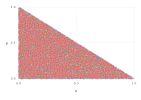

In [50]:
plot(layer(x=xs[1,:,:], y=xs[2,:,:], Geom.point, Theme(default_color=Color.AlphaColorValue(color("red"), 0.1))),
layer(x=xs[2,:,:], y=xs[3,:,:], Geom.point, Theme(default_color=Color.AlphaColorValue(color("green"), 0.1))),
layer(x=xs[1,:,:], y=xs[3,:,:], Geom.point, Theme(default_color=Color.AlphaColorValue(color("blue"), 0.1))))

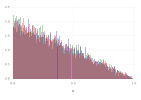

In [51]:
layers = Any[nothing for i in 1:3]
alpha = 0.3
colors = [Color.AlphaColorValue(color("red"), alpha), Color.AlphaColorValue(color("green"), alpha), Color.AlphaColorValue(color("blue"), alpha)]
for i in 1:3
    layers[i] = layer(x=xs[i,:,:], Geom.histogram(density=true), Theme(default_color=colors[i]))
end
plot(layers...)

In [53]:
ps = randn(3)
xs = Parameterizations.increasing_values(ps)
sum(abs(ps - Parameterizations.increasing_params(xs)))

1.1102230246251565e-16

In [58]:
ps = randn(3)
Parameterizations.increasing_values(ps)

3-element Array{Float64,1}:
 -0.415197
  0.333441
  0.535184

In [60]:
function lnprob(p)
    x = Parameterizations.increasing_values(p)
    if x[1] < 0.0 || x[2] < 0.0 || x[1] > 1.0 || x[2] > 1.0
        -Inf
    else
        Parameterizations.increasing_logjac(x, p)
    end
end

lnprob (generic function with 1 method)

In [65]:
xs = zeros(2,100)
for i in 1:100
    xs[:,i] = [0.1, 0.5] + 0.01*randn(2)
end
ps = zeros(2, 100)
for i in 1:100
    ps[:,i] = Parameterizations.increasing_params(xs[:,i])
end
lnprobs = EnsembleSampler.lnprobs(ps, lnprob)

100-element Array{Float64,1}:
 -0.916854
 -0.894845
 -0.928925
 -0.8936  
 -0.949979
 -0.881389
 -0.873561
 -0.887036
 -1.00262 
 -0.908643
 -0.880341
 -0.961949
 -0.940975
  ⋮       
 -0.955185
 -0.886989
 -0.849017
 -0.882411
 -0.900993
 -0.882788
 -0.858239
 -0.891434
 -0.94017 
 -0.940394
 -0.895253
 -0.907717

In [68]:
for i in 1:1000
    ps, lnprobs = EnsembleSampler.update(ps, lnprobs, lnprob)
end

In [69]:
chain, lnps = EnsembleSampler.run_mcmc(ps, lnprobs, lnprob, 1000; thin=10)

(
2x100x100 Array{Float64,3}:
[:, :, 1] =
  0.706473   0.0178591   0.25647   …   0.183916   0.184558   0.425117
 -1.87745   -1.08697    -0.425579     -1.27213   -0.680775  -0.742347

[:, :, 2] =
  0.740117   0.174194   0.282528  …   0.0354093   0.709192   0.297466
 -2.5064    -0.739958  -0.366097     -1.03028    -2.19385   -0.813401

[:, :, 3] =
  0.93972   0.374707   0.374115  …   0.0909097   0.820187   0.42185 
 -2.81445  -1.57957   -0.477086     -0.620276   -2.4541    -0.953734

...

[:, :, 98] =
  0.105039   0.0382931   0.503829  …   0.232338   0.0918005   0.466444
 -2.02376   -1.10147    -3.29077      -2.57345   -0.0992465  -1.25154 

[:, :, 99] =
  0.0980621   0.0515877   0.965944  …   0.821793   0.0655945   0.566707
 -0.382652   -0.63596    -5.60996      -3.43129   -0.0746819  -1.09973 

[:, :, 100] =
  0.203999   0.0301129   0.553604  …   0.678299   0.0445994   0.60397 
 -0.493763  -1.5557     -4.26289      -2.9535    -0.191916   -0.988055,

100x100 Array{Float64,2}:
 -1.87745 

In [70]:
xs = zeros(2, 100, 100)
for k in 1:100
    for j in 1:100
        xs[:,j,k] = Parameterizations.increasing_values(chain[:,j,k])
    end
end

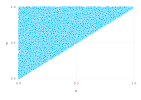

In [71]:
plot(x=xs[1,:,:], y=xs[2,:,:])

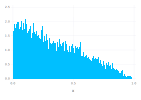

In [72]:
plot(x=xs[1,:,:], Geom.histogram(density=true))